# Jogo da Velha
https://www.youtube.com/watch?v=LUICgtok8QE

In [4]:
import cv2, os
import numpy as np
import random
from IPython.display import clear_output  #clear_output()

BLACK = (0,0,0)

def showImage(img):
    from matplotlib import pyplot as plt
    plt.imshow(img)
    plt.show()

In [5]:
def drawLine(image, startPoint, endPoint, color= BLACK, thickness=5):
    cv2.line(image,
        startPoint,
        endPoint,
        color,
        thickness)

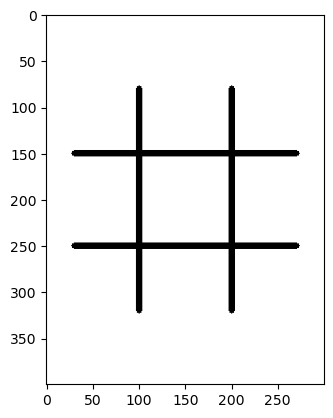

In [13]:
ticTacToeBoard = np.empty([400,300,3], dtype = np.uint8)
ticTacToeBoard.fill(255)

drawLine(ticTacToeBoard, (100,80), (100,320), BLACK, 5)
drawLine(ticTacToeBoard, (200,80), (200,320))
drawLine(ticTacToeBoard, (30,150), (270,150))
drawLine(ticTacToeBoard, (30,250), (270,250))

showImage(ticTacToeBoard)

In [9]:
def drawRectangleInBoard(image, posXboard, posYboard, color):
    startPosX, startPosY = 25 + posXboard * 100, 75 + posYboard * 100
    endPosX , endPosY = 75 + posXboard * 100, 125 + posYboard * 100 
    cv2.rectangle(image,
                    (startPosX,startPosY),
                    (endPosX,endPosY),
                    color,
                    -1)

In [16]:
def drawTriangleInBoard(image, posXboard, posYboard, color):
    startPosX, startPosY = 25 + posXboard * 100, 75 + posYboard * 100
    endPosX , endPosY = 75 + posXboard * 100, 125 + posYboard * 100 
   
    vertices = np.array([[((startPosX+endPosX)/2, startPosY), (startPosX,endPosY), (endPosX,endPosY)]], np.int32)
    #vertices = np.array([[startPosX, startPosX], [startPosX,endPosY], [endPosX,endPosY]], np.int32)
    cv2.fillPoly(image,
                vertices,
                color)

In [11]:
def checkGameOver(board):
 
    # checando colunas
    if board[0][0] == board[1][0] == board[2][0] and board[0][0] != 0:
        print('Vencedor',board[0][0])
        return board[0][0]
    elif board[0][1] == board[1][1] == board[2][1] and board[0][1] != 0:
        print('Vencedor',board[0][1])
        return board[0][1]
    elif board[0][2] == board[1][2] == board[2][2] and board[0][2] != 0:
        print('Vencedor',board[0][2])
        return board[0][2]

    # checando colunas
    elif board[0][0] == board[0][1] == board[0][2] and board[0][0] != 0:
        print('Vencedor',board[0][0])
        return board[0][0]
    elif board[1][0] == board[1][1] == board[1][2] and board[1][0] != 0:
        print('Vencedor',board[1][0])
        return board[1][0]
    elif board[2][0] == board[2][1] == board[2][2] and board[2][0] != 0:
        print('Vencedor',board[2][0])
        return board[2][0]

    # checando diagonais
    if board[0][0] == board[1][1] == board[2][2] and board[1][1] != 0:
        print('Vencedor',board[0][0])
        return board[0][0]
    elif board[0][2] == board[1][1] == board[2][0] and board[1][1] != 0:
        print('Vencedor',board[0][2])
        return board[0][2]
    elif '0' not in str(board):
        return -1
    else:
        return 0
    

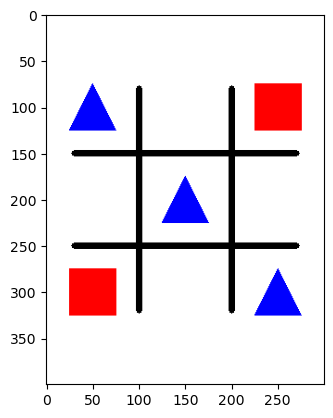

Vencedor 1
1 Jogada: 6
Você venceu!


In [18]:
# O jogo
currentMatch = ticTacToeBoard.copy()
showImage(currentMatch)
empate = -1
vazio = 0
humano = 1
cpu = 2

occupiedPositions = [[vazio,vazio,vazio],
                    [vazio,vazio,vazio],
                    [vazio,vazio,vazio]]

turno = humano
jogadas = 1
result = 0
while result == 0:
    if turno == humano:
        print('Turno do jogador Humano.')
        posX = int(input('Informe a posição X da sua jogada:')) %3
        posY = int(input('Informe a posição Y da sua jogada:')) %3

        while occupiedPositions[posX][posY] != vazio:
            print('Posição ocupada.')
            posX = int(input('Informe a posição X da sua jogada:')) %3
            posY = int(input('Informe a posição Y da sua jogada:')) %3
        occupiedPositions[posX][posY] = humano
        drawTriangleInBoard(currentMatch,posX,posY,(0,0,255))
        turno = cpu

        clear_output()

    else:
        print('Turno do jogador CPU.')
        posX, posY = random.randint(0,2), random.randint(0,2)
        while occupiedPositions[posX][posY] != vazio:
            posX, posY = random.randint(0,2), random.randint(0,2)
        occupiedPositions[posX][posY] = cpu
        drawRectangleInBoard(currentMatch,posX,posY,(255,0,0))
        turno = humano
    
    showImage(currentMatch)
    jogadas += 1

    result = checkGameOver(occupiedPositions)
    print(result, 'Jogada:',jogadas)
    if result == empate:
        print('Empate!')
        break
    elif result == humano:
        print('Você venceu!')
        break
    elif result == cpu:
        print('CPU venceu!')
        break

In [39]:
occupiedPositions

[[2, 1, 1], [1, 2, 2], [1, 2, 1]]

# Jogo da Velha - FIM